# Goals: build Linear Regression with weight decay (L2 regularization) from scratch

Use only python and limited numpy function

Produce comparable results to sklearn linear regression model

In [43]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
from model.metrics import MSE
from model.gradients import MSE_grad
from model.utils import *
import matplotlib.pyplot as plt
seed=42
np.random.seed(seed)

# Create linear regression dataset

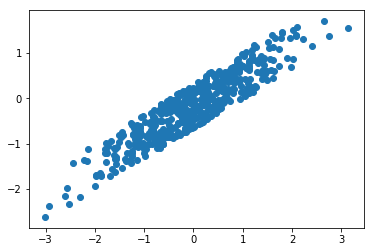

In [7]:
# 1 dimension
size=500
X,y,W = generate_linear_dataset(size,1,is_reg=True)
plt.scatter(X[:,1],y)

# Metric

We use mean squared error for this problem

In [8]:
loss_fn = MSE

Get MSE gradient function as well

In [9]:
grad_fn = MSE_grad

# Customized Linear Regression

In [17]:
from model.linear_model import CustomLinearModel

## 1 dimension dataset (sanity check)

20. Training loss: 0.44617996172620167, Val loss:0.4514825940887405
40. Training loss: 0.2507613389857851, Val loss:0.24343372196502602
60. Training loss: 0.15977182059995712, Val loss:0.14740393671335295
80. Training loss: 0.11721385403121577, Val loss:0.10334857350124761
100. Training loss: 0.09722072416032311, Val loss:0.08336454332895568
120. Training loss: 0.08778831411159306, Val loss:0.07447649193163913
140. Training loss: 0.08332018665268479, Val loss:0.07065706248398455
160. Training loss: 0.08119548263194104, Val loss:0.06911632532188368
180. Training loss: 0.08018147103389936, Val loss:0.06857220352069236
200. Training loss: 0.07969589668762059, Val loss:0.06844310612413324


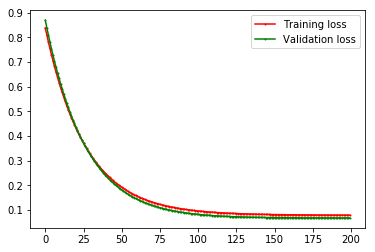

In [37]:
size=500
dim=1
X1,y1,W = generate_linear_dataset(size,dim,is_reg=True)


lr = CustomLinearModel(dim,True,loss_fn,grad_fn)
lr.fit(X1,y1,lr=0.01,n_iteration =200,val_ratio=0.2)

Plot validation prediction

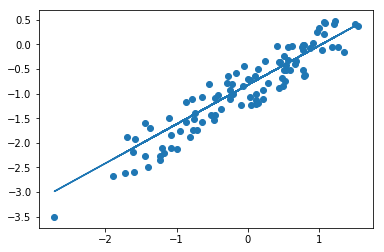

In [38]:
X_train,y_train,X_val,y_val = get_train_val(X1,y1)

y_val_pred = lr.predict(X_val)
plt.scatter(X_val[:,1],y_val)
plt.plot(X_val[:,1],y_val_pred)
plt.show()

Looks good. We will use higher dimension dataset for benchmarking

## Higher dimension dataset

In [41]:
dim=50
size=5000
X,y,W =generate_linear_dataset(size,dim,1)

In [42]:
print(f'X shape: {X.shape}')

X shape: (5000, 51)


# Gradient Descent

## No regularization (l2 = 0)

20. Training loss: 28.901880952406792, Val loss:31.397430068902928
40. Training loss: 12.98340776617774, Val loss:14.330496500240853
60. Training loss: 5.975418326271452, Val loss:6.700177494063113
80. Training loss: 2.8665957707181695, Val loss:3.2621452161171227
100. Training loss: 1.4770217110533665, Val loss:1.7005290991847344
120. Training loss: 0.8512675453832887, Val loss:0.9851762212300313
140. Training loss: 0.5674128530523539, Val loss:0.6544758713421245
160. Training loss: 0.4377322636707468, Val loss:0.500039160068289
180. Training loss: 0.3780780844380569, Val loss:0.42707610764546394
200. Training loss: 0.3504544647776254, Val loss:0.3921307387836988
220. Training loss: 0.33758175990377126, Val loss:0.37511598808970825
240. Training loss: 0.3315467803092732, Val loss:0.3666638131232903
260. Training loss: 0.32870127089680384, Val loss:0.3623617566526193
280. Training loss: 0.3273523679676419, Val loss:0.3601077504024579
300. Training loss: 0.3267096874152663, Val loss:0.3

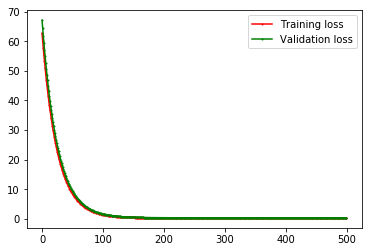

In [45]:
lr = CustomLinearModel(dim,True,loss_fn,grad_fn)
lr.fit(X,y,0.01,n_iteration=500)

## With regularization

20. Training loss: 26.97275183985929, Val loss:28.346814310870535
40. Training loss: 12.072374337702401, Val loss:12.7866771076634
60. Training loss: 5.536706319130429, Val loss:5.896560523996934
80. Training loss: 2.6533613133877942, Val loss:2.83027051467551
100. Training loss: 1.3737302135255587, Val loss:1.4591058392992318
120. Training loss: 0.802352765222579, Val loss:0.8431766040162969
140. Training loss: 0.5456166743101911, Val loss:0.5653562210886841
160. Training loss: 0.4295073181795536, Val loss:0.43959071881980344
180. Training loss: 0.3766405314674351, Val loss:0.3824912677009214
200. Training loss: 0.3523968825806322, Val loss:0.35651283919386767
220. Training loss: 0.34119363513458134, Val loss:0.34468068779848776
240. Training loss: 0.3359726989900621, Val loss:0.33929225267110874
260. Training loss: 0.33351646534274715, Val loss:0.3368419839249991
280. Training loss: 0.33234821644730056, Val loss:0.3357310803567921
300. Training loss: 0.331785383418126, Val loss:0.335

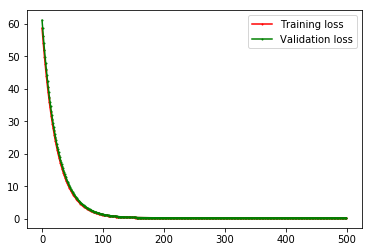

In [46]:
lr = CustomLinearModel(dim,True,loss_fn,grad_fn)
lr.fit(X,y,0.01,2,n_iteration=500)

Model with no L2 suffer a bit of overfitting. The model with L2 = 2 achieves better validation score (0.3348) with no overfitting

# Stochastic Gradient Descent

## No regularization

Epoch 1. Training loss: 35.011732545622806, Val loss:13.487340493084877
Epoch 2. Training loss: 6.840769471114303, Val loss:2.9048505992299596
Epoch 3. Training loss: 1.5874185283481905, Val loss:0.8452833589067272
Epoch 4. Training loss: 0.5827963199184825, Val loss:0.4340475207244829
Epoch 5. Training loss: 0.3858226355538165, Val loss:0.3501430836692389
Epoch 6. Training loss: 0.34632363580007147, Val loss:0.3328553843930358
Epoch 7. Training loss: 0.33827916979391887, Val loss:0.32937126340436673
Epoch 8. Training loss: 0.3366432815024897, Val loss:0.3287480974026742
Epoch 9. Training loss: 0.3363250303830402, Val loss:0.3286898776950502
Epoch 10. Training loss: 0.3362732697758323, Val loss:0.32872141712312913


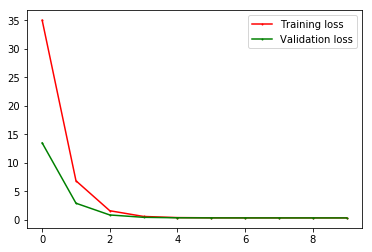

In [66]:
lr = CustomLinearModel(dim,True,loss_fn,grad_fn)
lr.fit_epoch(X,y,0.01,10,100)

## With L2 regularization

Epoch 1. Training loss: 34.64339631883298, Val loss:12.725036484410513
Epoch 2. Training loss: 6.864643839181549, Val loss:2.7499008410750725
Epoch 3. Training loss: 1.646051362241083, Val loss:0.8316755432865248
Epoch 4. Training loss: 0.6223200583135308, Val loss:0.4472851131182618
Epoch 5. Training loss: 0.40779027369041354, Val loss:0.3655278937820688
Epoch 6. Training loss: 0.35809146589408974, Val loss:0.3465439853363722
Epoch 7. Training loss: 0.34488368165264227, Val loss:0.3415685071653396
Epoch 8. Training loss: 0.34078642677257603, Val loss:0.3400629666702526
Epoch 9. Training loss: 0.33932809476831444, Val loss:0.33953954358968835
Epoch 10. Training loss: 0.3387552400044156, Val loss:0.33933653207586156


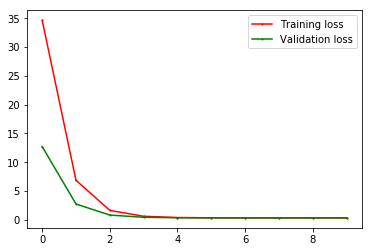

In [71]:
lr = CustomLinearModel(dim,True,loss_fn,grad_fn)
lr.fit_epoch(X,y,0.01,10,100,l2=1)

Model with no L2 is already good enough, thus adding L2 doesn't help much

## Sklearn Linear Regression (for comparison)

In [72]:
from sklearn.linear_model import LinearRegression

X_train,y_train,X_val,y_val = get_train_val(X,y,.2)
lr = LinearRegression()
lr.fit(X_train,y_train)
print('MSE on valid set: ')
print(MSE(y_val,lr.predict(X_val)))

MSE on valid set: 
0.3521547242625167


## Sklearn Linear Regression with L2 regularization

In [73]:
from sklearn.linear_model import Ridge

X_train,y_train,X_val,y_val = get_train_val(X,y,.2)
lr = Ridge(1,max_iter=50,random_state=42)
lr.fit(X_train,y_train)
print('MSE on valid set: ')
print(MSE(y_val,lr.predict(X_val)))

MSE on valid set: 
0.34928492623012997


My model is somehow a bit better than sklearn linear regression